![WoMa](http://astro.dur.ac.uk/~cklv53/woma_logo.png "WoMa")
 <a id="top"></a>

# Welcome to WoMa

This tutorial notebook covers the main features of WoMa. Let's get started!

Also see the `README.md` for more documentation.

## Contents:
[1.](#1_spherical_profiles) Spherical planetary profiles

[2.](#2_spinning_profiles) Spinning planetary profiles

[3.](#3_particles) Particle placement

---

#### 0. Quick notes
Most WoMa functions take an optional `verbosity` argument that controls the amount of printed information. Set `0` for no printing, `1` for standard output, or `2` for extra details.

Arrays in WoMa are explicitly labelled with a prefix `A1_`, or `An_` for an `n`-dimensional array.

Further developments and extensions to WoMa are actively ongoing, so do let us know if there is a feature you would like, or of course if you find any bugs!

---

 <a id="1_spherical_profiles"></a>

 ## 1. Spherical planetary profiles

First let's import WoMa, set some constants, and make a simple plotting function to display the planets we create:

In [ ]:
import woma
import matplotlib.pyplot as plt

R_earth = 6.371e6   # m
M_earth = 5.972e24  # kg m^-3 

def plot_spherical_profiles(planet):    
    fig, ax = plt.subplots(2, 2, figsize=(8,8))
    
    ax[0, 0].plot(planet.A1_r / R_earth, planet.A1_rho)
    ax[0, 0].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[0, 0].set_ylabel(r"Density, $\rho$ [kg m$^{-3}$]")
    ax[0, 0].set_yscale("log")
    ax[0, 0].set_xlim(0, None)
    
    ax[1, 0].plot(planet.A1_r / R_earth, planet.A1_m_enc / M_earth)
    ax[1, 0].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[1, 0].set_ylabel(r"Enclosed Mass, $M_{<r}$ $[M_\oplus]$")
    ax[1, 0].set_xlim(0, None)
    ax[1, 0].set_ylim(0, None)
    
    ax[0, 1].plot(planet.A1_r / R_earth, planet.A1_P)
    ax[0, 1].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[0, 1].set_ylabel(r"Pressure, $P$ [Pa]")
    ax[0, 1].set_yscale("log")
    ax[0, 1].set_xlim(0, None)
    
    ax[1, 1].plot(planet.A1_r / R_earth, planet.A1_T)
    ax[1, 1].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[1, 1].set_ylabel(r"Temperature, $T$ [K]")
    ax[1, 1].set_xlim(0, None)
    ax[1, 1].set_ylim(0, None)
    
    plt.tight_layout()
    plt.show()

### 1.1 One-layer planets

Let's start by building a simple, spherical, 1 layer planet.

WoMa provides many options for which inputs you provide and which are calculated. We'll cover other options later, or see `README.md` for the full documentation.

For any planet we want to build, we need to specify:
- The equation of state (EoS) for every material: e.g. Tillotson basalt. 
- A temperature--density relation for every material: e.g. adiabatic, or a power-law $T\propto\rho^\alpha$ ($\alpha=0$ for isothermal).
- Two of the following three values at the surface of the planet: pressure $P_{\rm s}$, temperature $T_{\rm s}$, and density $\rho_{\rm s}$. e.g. $P_{\rm s}=10^5\, \rm Pa$ and $T_{\rm s}=1000\, \rm K$.

In [ ]:
planet = woma.Planet(
    name            = "my_first_planet",
    A1_mat_layer    = ["Til_basalt"],
    A1_T_rho_type   = ["power=2"],
    P_s             = 1e5,
    T_s             = 500,
)

For spherical 1 layer planets we can specify either the total radius `R` or the total mass `M` of the planet, then WoMa will find the value for other such that we get a valid planet in hydrostatic equilibrium.

Let's set our planet's radius to $1~R_\oplus$. (We could have set this along with the other parameters in the previous cell.)

In [ ]:
planet.R = R_earth

We now select the appropiate method to make the planet profiles.

In this case, we are generating (`gen_prof`) a one layer planet (`L1`) and need to find the mass (`find_M`) for our chosen radius (`given_R`). This function also needs a rough value for the maximum mass `M_max`, let's say a generous $2~M_\oplus$.

In [ ]:
planet.gen_prof_L1_find_M_given_R(M_max=2 * M_earth)

We can see from the printed output (or by printing `planet.M`) that the mass of our planet is about $\tfrac{2}{3}~M_\oplus$, along with other information.

Let's plot the resulting profiles:

In [ ]:
plot_spherical_profiles(planet)

As mentioned above, we could instead set the total mass `M` to derive the radius. 

Let's also try an isothermal temperature relation.

In [ ]:
planet = woma.Planet(
    name            = "my_second_planet",
    A1_mat_layer    = ["Til_basalt"],
    A1_T_rho_type   = ["power=0"],
    P_s             = 1e5,
    T_s             = 500,
    M               = M_earth,
)

# Generate the profiles
planet.gen_prof_L1_find_R_given_M(R_max=2 * R_earth)

# Plot the results
plot_spherical_profiles(planet)

### 1.2 Two-layer planets

Let's move on to make some 2 layer planets. 

We'll also try some more realistic ANEOS equations of state for an Earth-like core and mantle, with adiabatic temperature--density relations:

In [ ]:
planet = woma.Planet(
    name            = "hello_world",
    A1_mat_layer    = ["ANEOS_Fe85Si15", "ANEOS_forsterite"],
    A1_T_rho_type   = ["adiabatic", "adiabatic"],
    P_s             = 1e5,
    T_s             = 1000,
)

For 2 layer planets we have more options for which properties of our planet we choose and which unknowns are derived. 

For example, we can set the total mass `M` and radius `R`, and get WoMa to find the boundary radius. (We could have set these along with the other parameters in the previous cell.)

In [ ]:
planet.M = M_earth
planet.R = R_earth

# Generate the profiles
planet.gen_prof_L2_find_R1_given_R_M()

# Plot the results
plot_spherical_profiles(planet)

Or, we could set the masses of each layer, `A1_M_layer`, and get WoMa to find the radii of the boundary and the outer edge. As before, we also need to give a maximum possible radius.

Let's try a random mix of SESAME and Tillotson materials with an adiabatic mantle and a power-law core:

In [ ]:
planet = woma.Planet(
    A1_mat_layer    = ["Til_iron", "SESAME_basalt"],
    A1_T_rho_type   = ["power=0.5", "adiabatic"],
    P_s             = 1e5,
    T_s             = 1000,
    A1_M_layer      = [0.3 * M_earth, 0.7 * M_earth],
)

# Generate the profiles
planet.gen_prof_L2_find_R1_R_given_M1_M2(R_max=2 * R_earth)

# Plot the results
plot_spherical_profiles(planet)

### 1.3 Three-layer planets

With 3 layers there are a huge number of possible inputs and unknowns, several but not all of which are available in WoMa. Some of these require repeated iterations over multiple variables, so can take several minutes.

Further developments are ongoing, so if you have a particular choice of parameters that you'd like to set and/or determine then please let us know! You can of course do the iterations yourself, systematically varying an input to a WoMa function until you get the output you need.

For example, let's create an ice giant by setting the total mass and the radii at the base and top of the atmosphere.

In [ ]:
planet = woma.Planet(
    A1_mat_layer    = ["HM80_rock", "HM80_ice", "HM80_HHe"],
    A1_T_rho_type   = ["power=0", "power=0.9", "adiabatic"],
    P_s             = 1e5,
    T_s             = 70,
    M               = 14.5 * M_earth,
    A1_R_layer      = [None, 3 * R_earth, 4 * R_earth],
)

# Generate the profiles
planet.gen_prof_L3_find_R1_given_R_M_R2()

# Plot the results
plot_spherical_profiles(planet)

Let's make one final Earth-like (ish) planet and add an atmosphere on top of the inner two layers, choosing their masses. The atmosphere's mass will depend primarily on the pressure at its base.

In this case, the input "surface" `_s` parameters set the conditions at the base of the atmosphere, i.e. the surface of the inner two layers.

We also need to set the minimum density at which our atmosphere will stop, since in this case the third layer profiles are integrated outwards.

In [ ]:
planet = woma.Planet(
    A1_mat_layer    = ["Til_iron", "Til_basalt", "SESAME_N2"],
    A1_T_rho_type   = ["power=2", "power=2", "power=0"],
    A1_M_layer      = [0.3 * M_earth, 0.7 * M_earth, None],
    P_s             = 1e8,
    T_s             = 1000,
)

# Generate the profiles
planet.gen_prof_L3_find_R1_R2_given_M1_M2_add_L3(rho_min=1, R_max=3 * R_earth)

# Plot the results
plot_spherical_profiles(planet)

---

 <a id="2_spinning_profiles"></a>

[Back to Contents](#top)

## 3. Spinning planetary profiles

As we did for the spherical profiles, let's first import WoMa, set some constants, and make a simple plotting function to display the planets we create.

As described in [Ruiz-Bonilla et al. 2020](...), we can model a spinning body as a system of concentric spheroids of constant density. This means the full 3D density profile (and temperature etc.) can be described using just the 1D equatorial and polar profiles.

In [1]:
import woma
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

R_earth = 6.371e6   # m
M_earth = 5.972e24  # kg m^-3 

def plot_spinning_profiles(p):    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    
    ax[0].plot(p.A1_r / R_earth, p.A1_rho, label="original spherical")
    ax[0].plot(p.A1_r_eq / R_earth, p.A1_rho_eq, label="equatorial")
    ax[0].plot(p.A1_r_po / R_earth, p.A1_rho_po, label="polar")
    ax[0].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[0].set_ylabel(r"Density, $\rho$ [kg m$^{-3}$]")
    ax[0].set_yscale("log")
    ax[0].set_xlim(0, 1.2 * p.A1_r[-1] / R_earth)
    ax[0].legend()
    
    A1_r_grid = np.linspace(0, np.max(p.A1_r_eq), 200)
    A1_z_grid = np.linspace(0, np.max(p.A1_r_po), 200)
    A2_rho_grid = np.zeros((A1_r_grid.shape[0], A1_z_grid.shape[0]))
    for i in range(A2_rho_grid.shape[0]):
        radius = A1_r_grid[i]
        for j in range(A2_rho_grid.shape[1]):
            z = A1_z_grid[j]
            A2_rho_grid[i, j] = woma.rho_at_r_z(
                radius, z, p.A1_r_eq, p.A1_rho_eq, p.A1_r_po, p.A1_rho_po
            )
    
    X, Y = np.meshgrid(A1_r_grid / R_earth, A1_z_grid / R_earth)
    Z = A2_rho_grid.T
    Z[Z == 0] = np.nan
    cmesh = ax[1].pcolormesh(X, Y, Z, norm=LogNorm())
    cbar = plt.colorbar(cmesh)
    cbar.ax.set_ylabel(r"Density [kg m$^{-3}$]")
    ax[1].set_aspect("equal")
    ax[1].set_xlabel(r"Equatorial Radius, $r_{xy}$ $[R_\oplus]$")
    ax[1].set_ylabel(r"Polar Radius, $z$ $[R_\oplus]$")
    
    plt.tight_layout()
    plt.show()

To construct a spheroidal planet in WoMa we start from a spherical profile. Let's remake one of the simple 2 layer examples from the previous section as our input.

In [ ]:
planet = woma.Planet(
    A1_mat_layer    = ["Til_iron", "Til_basalt"],
    A1_T_rho_type   = ["power=2", "power=2"],
    P_s             = 1e5,
    T_s             = 1000,
    M               = M_earth,
    A1_R_layer      = [None, R_earth],
)

# Generate the profiles
planet.gen_prof_L2_find_R1_given_R_M(verbosity=0)

We now use the `SpinPlanet` class and pass it the spherical planet with the period we want. Note the period is set in units of hours.

Let's try a very rapid rotation for our Earth-like planet of 5 hours.

The simplest option is to then call the minimal `spin()` function to create our rotating planet.

In [ ]:
planet = woma.SpinPlanet(
    planet = two_layer_planet,
    period = 5, # h
)

# Generate the spinning profiles
planet.spin()

Let's plot the resulting profiles:

In [ ]:
plot_spinning_profiles(planet)

We can see from the printed output that our spinning planet has a slightly different mass to the spherical input by default.

To keep the mass the same, simply set the `fix_mass` argument to `True`, which just requires a little extra iteration:

In [ ]:
spinning_planet = woma.spin_planet_fix_M(
    planet      = two_layer_planet, 
    period      = 5, # h
    max_iter_1  = 5,
    max_iter_2  = 5,
)

In [ ]:
spinning_planet = woma.SpinPlanet(
    planet = two_layer_planet,
    period = 3, # hours
)

# Generate the spinning profiles
spinning_planet.spin(fix_mass=True)

# Plot the results
plot_spinning_profiles(spinning_planet)

WoMa also calculates the minimum possible period for this planet, i.e. the fastest it can spin before flying apart.

Let's compute the spinning planetary profile of the planet with its minimum period:

In [ ]:
l2_test_spin = woma.SpinPlanet(
    planet  = l2_test,
    R_e_max = 2.3 * R_earth,
    R_p_max = 1.3 * R_earth,
    period  = 0.001  # h
)

l2_test_spin.spin()

plot_spin_profile(l2_test_spin)

---

 <a id="3_particles"></a>

[Back to Contents](#top)

## 3. Particle placement (e.g. for SPH) 

Creating particle representations with WoMa is done in the same way for spinning and spherical planets.

For spherical profiles, we use the fast SEA algorithm ([Kegerreis et al. 2019](https://doi.org/10.1093/mnras/stz1606)) to place particles to precisely match the profile densities. 

For spinning profiles, we use a modified version of SEA as described in [Ruiz-Bonilla et al. 2020](...).

The particles' other properties (e.g. temperature, material type) all match the input profiles too, with ~equal mass for all particles. The concentric shells of particles also align automatically with any material and surface boundaries in the profiles.

Further documentation and examples for the [SEAGen](https://pypi.org/project/seagen/) python package are available at [github.com/jkeger/seagen](https://github.com/jkeger/seagen).

Try `verbosity=1` or `2` for more information as well.

In [2]:
import woma

R_earth = 6.371e6   # m
M_earth = 5.972e24  # kg m^-3 

Let's start with a simple 2 layer spherical planet like we did above, then create two versions with sets of $10^5$ and $10^7$ particles:

In [3]:
planet = woma.Planet(
    A1_mat_layer    = ["Til_iron", "Til_basalt"],
    A1_T_rho_type   = ["power=2", "power=2"],
    P_s             = 1e5,
    T_s             = 1000,
    M               = M_earth,
    R               = R_earth,
)

# Generate the profiles
planet.gen_prof_L2_find_R1_given_R_M()

Iteration 10/40. Tolerance reached 8.09e-04/0.001
Tweaking M to avoid peaks at the center of the planet...
Iteration 23/40. Tolerance reached 6.26e-08/1e-07
Done!
Planet "None": 
    M            = 5.9702e+24  kg  = 0.99962  M_earth
    R            = 6.371e+06  m  = 1  R_earth
    mat          = ["Til_iron", "Til_basalt"] 
    mat_id       = [100, 103] 
    T_rho_type   = ["power=2", "power=2"] 
    R_layer      = [0.60296, 1]  R_earth
    M_layer      = [0.48997, 0.50966]  M_earth
    M_frac_layer = [0.49015, 0.50985]  M_tot
    idx_layer    = [6029, 9999] 
    P_s          = 1e+05  Pa
    T_s          = 1000  K
    rho_s        = 2269.4  kg m^-3
    P_1          = 1.0959e+11  Pa
    T_1          = 4708.8  K
    rho_1        = 10398  kg m^-3
    P_0          = 4.7201e+11  Pa
    T_0          = 9725.5  K
    rho_0        = 14944  kg m^-3
    I_MR2        = 0.29618  M_tot*R_tot^2


In [ ]:
# Create the sets of particles
particles_low_res = woma.ParticlePlanet(planet, 1e5, verbosity=0)

particles_high_res = woma.ParticlePlanet(planet, 1e7, verbosity=0)

We can now print, save, or do whatever we like with the particle data. 

See the `ParticlePlanet` class docstring in `woma/main.py` for the full output documentation.

For example, let's just print the position, mass, density, and temperature of the 123$^{\rm rd}$ particle:

In [ ]:
print(particles_high_res.A2_pos[123] / R_earth, "R_earth")
print(particles_high_res.A1_m[123] / M_earth, "M_earth")
print(particles_high_res.A1_rho[123], "kg m^-3")
print(particles_high_res.A1_T[123], "K")

Note that the resulting number of particles may be slightly different from our input value. 

This is a consequence of needing to place integer numbers of particles in each shell, combined with the particle-mass tweaking required to align the particle shells with the profile boundaries.

In [ ]:
print(particles_low_res.N_particles)
print(particles_high_res.N_particles)

For a smoothed particle hydrodynamics (SPH) simulation, we can also input the number of neighbours for a quick and crude estimate of each particle's smoothing length from its density.

In [ ]:
particles_low_res = woma.ParticlePlanet(planet, 1e5, N_ngb=48, verbosity=0)

print(particles_low_res.A1_h[123] / R_earth, "R_earth")

Everything works the same for a spinning planet.

Let's give our example planet a pretty rapid rotation period, then place particles as before.

In [4]:
spin_planet = woma.SpinPlanet(
    planet  = planet,
    period  = 6,  # h
)

spin_planet.spin()

Computing spinning profile:   0%|          | 0/15 [00:42<?, ?it/s]

Tolerance level criteria reached.
Planet "None": 
    period       = 6  h
    M            = 5.989e+24  kg  = 1.0028  M_earth
    R_eq         = 6.4922e+06  m  = 1.019  R_earth
    R_po         = 6.1988e+06  m  = 0.97297  R_earth
    mat          = ["Til_iron", "Til_basalt"] 
    mat_id       = [100, 103] 
    R_layer_eq   = [0.6046, 1.019]  R_earth
    R_layer_po   = [0.58498, 0.97297]  R_earth
    M_layer      = [0.4858, 0.51698]  M_earth
    M_frac_layer = [0.48445, 0.51555]  M_tot
    P_s          = 1e+05  Pa
    T_s          = 1001.5  K
    rho_s        = 2269.4  kg m^-3
    P_1          = 1.0959e+11  Pa
    T_1          = 4708.8  K
    rho_1        = 10398  kg m^-3
    P_0          = 4.7201e+11  Pa
    T_0          = 7039.6  K
    rho_0        = 14944  kg m^-3


0.0
0.0
0.0
0.0
6492170.17017017
6198820.440092194


ZeroDivisionError: division by zero

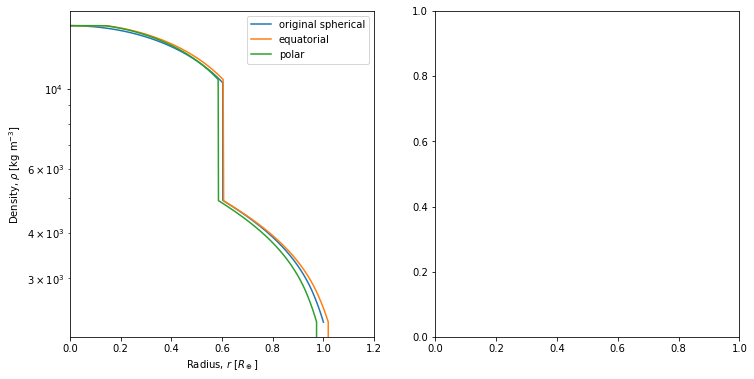

In [5]:
plot_spinning_profiles(spin_planet) ####

In [ ]:
particles = woma.ParticlePlanet(spin_planet, 1e6, N_ngb=48, verbosity=0)

print(particles_high_res.A2_pos[123] / R_earth, "R_earth")

---

[Back to Contents](#top)